<a href="https://colab.research.google.com/github/aczoo/ugh/blob/master/hoohacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

import re,string
from string import punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

np.random.seed(42)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

news = pd.read_csv('/content/news.csv', header=None)
news.drop(news.columns[[0]], axis=1, inplace=True)
columns = news.iloc[0]
news = news[1:]
news.columns =columns
news.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,label
1,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
2,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
4,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
5,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
6,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
7,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
8,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
9,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
10,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


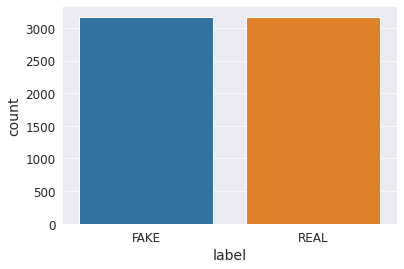

In [9]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(news.label)

In [10]:
stop = set(stopwords.words('english'))
punctuation = list(punctuation)
stop.update(punctuation)

In [11]:
def clean_text(text):
    text = re.sub('\[[^]]*\]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = " ".join([x for x in text.split() if x.strip().lower() not in stop])
    return text
news['text']=news['text'].apply(clean_text)

In [12]:
real_news = news[news['label'] =="REAL"]
fake_news = news[news['label'] =="FAKE"]

In [13]:
real_news.head()

,title,text,label
3,Kerry to go to Paris in gesture of sympathy,U.S. Secretary State John F. Kerry said Monday...,REAL
5,The Battle of New York: Why This Primary Matters,primary day New York front-runners Hillary Cli...,REAL
8,‘Britain’s Schindler’ Dies at 106,Czech stockbroker saved 650 Jewish children Na...,REAL
9,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton Donald Trump made inaccurate c...,REAL
10,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly made last-ditch...,REAL


In [14]:
fake_news.head()

,title,text,label
1,You Can Smell Hillary’s Fear,"Daniel Greenfield, Shillman Journalism Fellow ...",FAKE
2,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
4,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 l...",FAKE
6,"Tehran, USA","I’m immigrant, grandparents are. 50 years ago,...",FAKE
7,Girl Horrified At What She Watches Boyfriend D...,"Share Baylee Luciani (left), Screenshot Baylee...",FAKE


**Fake News**

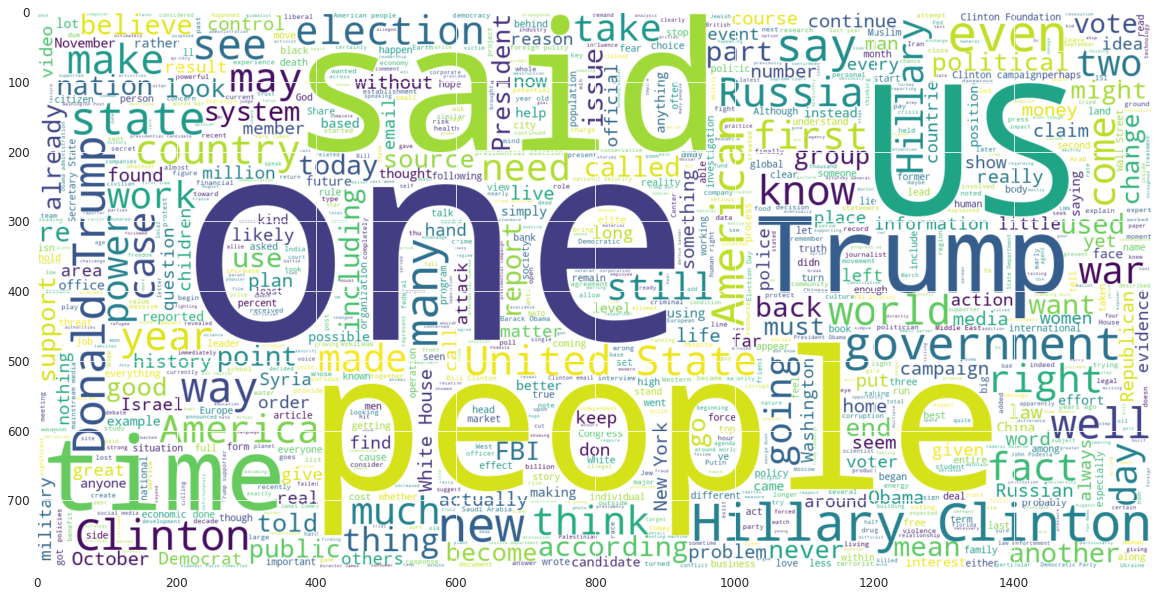

In [15]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color ='white', max_words = 1000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(fake_news.text))
plt.imshow(wc , interpolation = 'bilinear')

**Fake News**

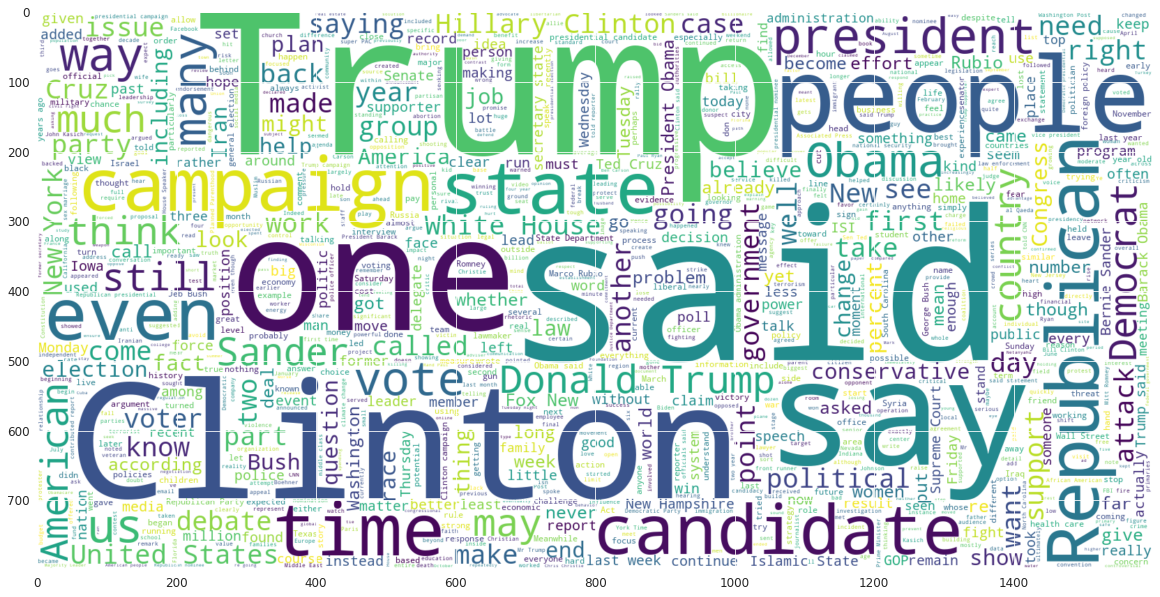

In [16]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color ='white', max_words = 1000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(real_news.text))
plt.imshow(wc , interpolation = 'bilinear')

In [17]:
from sklearn.model_selection import train_test_split
nums = {"REAL":0,"FAKE":1}
X_train, X_test, y_train, y_test = train_test_split(news["text"],[nums[x] for x in news["label"]], test_size=0.25, random_state=42)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =TfidfVectorizer(stop_words='english', max_df=0.7)
x_vector_train=vectorizer.fit_transform(X_train)
x_vector_test = vectorizer.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_vector_train,y_train)
predected= logreg.predict(x_vector_test)
logreg.score(x_vector_test, y_test)*100


91.54040404040404

In [20]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_vector_train,y_train)
y_pred=pac.predict(x_vector_test)
score=accuracy_score(y_test,y_pred)
print(score*100)

93.18181818181817


In [25]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,y_pred)


Text(66.0, 0.5, 'Actual')

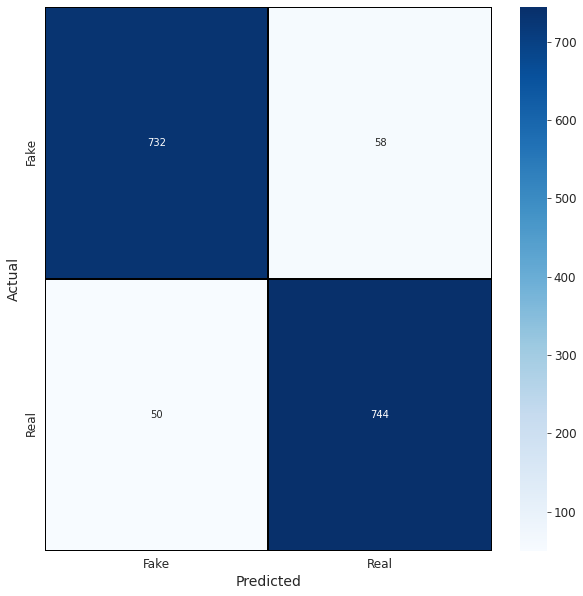

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Fake','Real'] , yticklabels = ['Fake','Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")